<a href="https://colab.research.google.com/github/NiranjanYeole/ADS_60/blob/main/Niranjan_60_ads_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## REQUIRED LIBRARIES
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
# Read the data frame
df = pd.read_csv('/content/d4_AB_NYC_2019.csv', delimiter=',')
df.shape

(48895, 16)

In [ ]:
# Check columns list and missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Get unique count for each variable
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
# Drop the columns as explained above
df = df.drop(["host_id", "id", "name"], axis = 1)

In [ ]:
# Review the top rows of what is left of the data frame
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Check variable data types
df.dtypes

host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

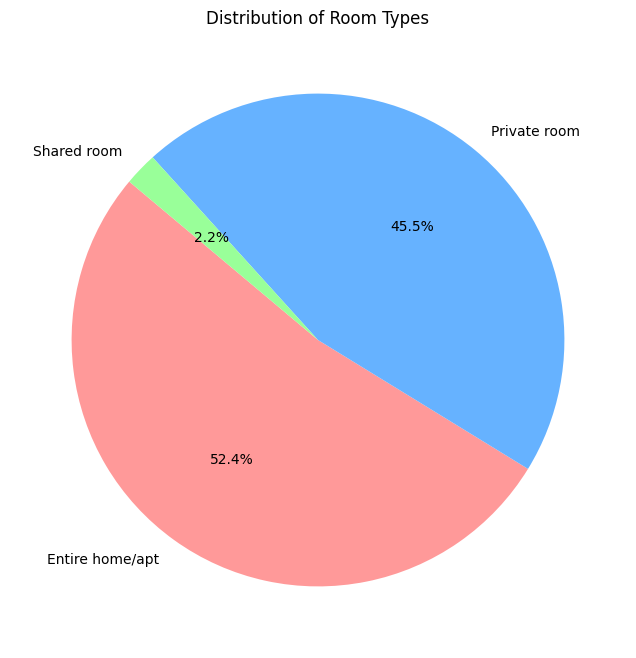

In [ ]:
room_type_counts = df['room_type'].value_counts()
labels = room_type_counts.index
sizes = room_type_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title('Distribution of Room Types')
plt.show()

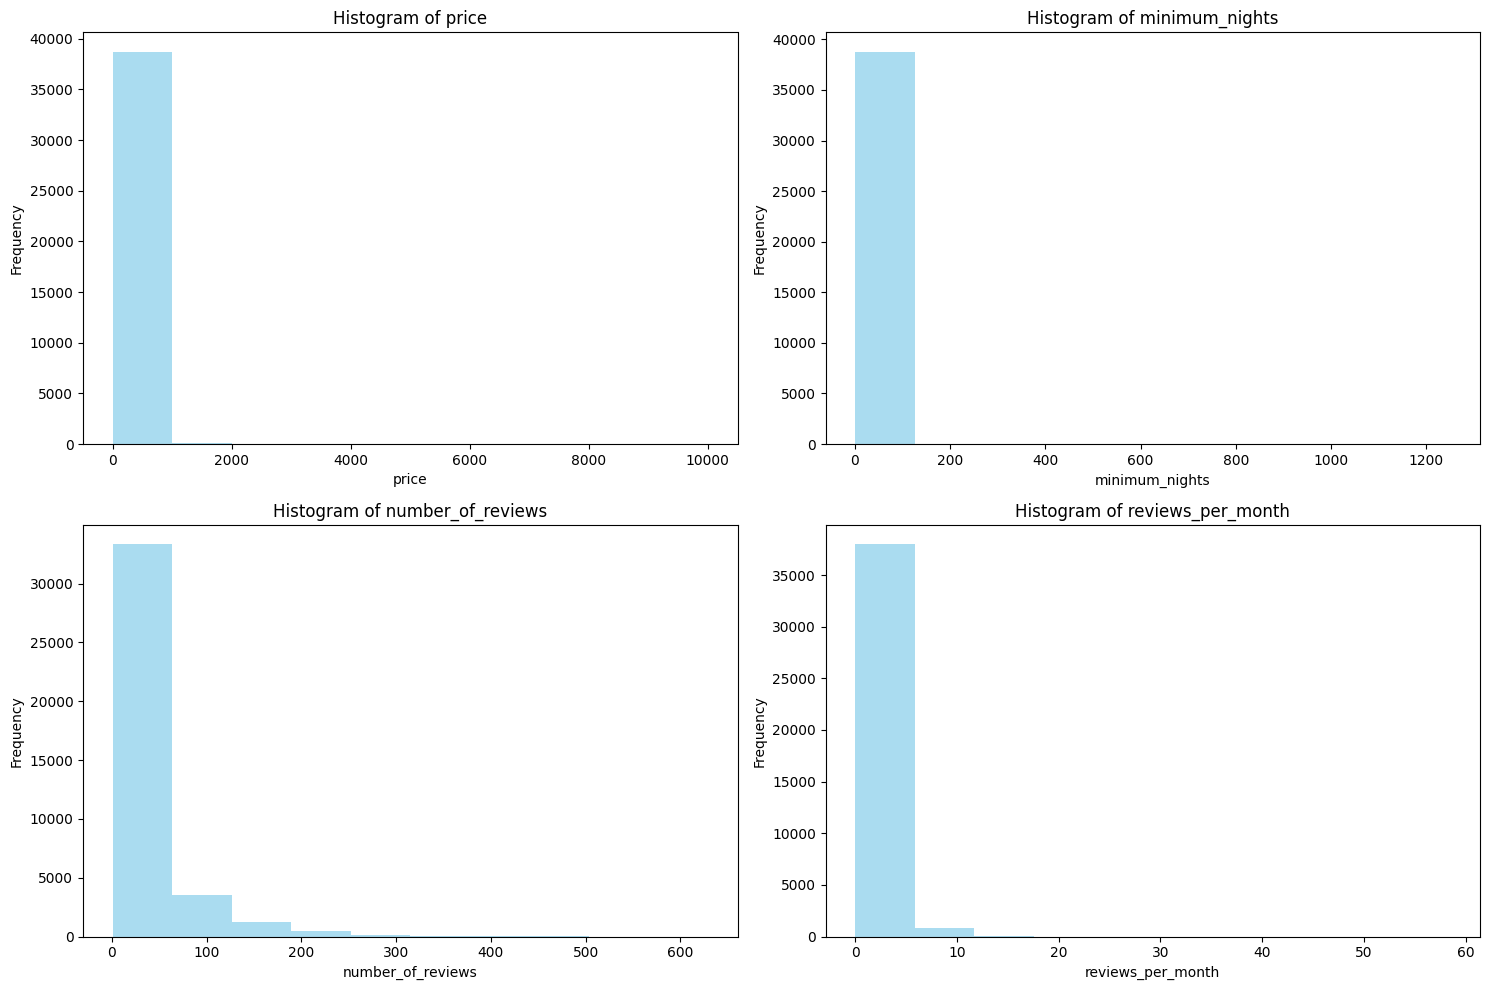

In [ ]:
# Select columns for which you want to create histograms
columns_for_histogram = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']

# Calculate the number of rows and columns for subplots
num_rows = len(columns_for_histogram) // 2 + len(columns_for_histogram) % 2
num_cols = 2

# Create subplots
fig, axarr = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the 2D array of subplots for ease of indexing
axarr = axarr.flatten()

# Plot histograms for each selected column
for i, column in enumerate(columns_for_histogram):
    axarr[i].hist(df[column], bins=10, color='skyblue', alpha=0.7)
    axarr[i].set_title(f'Histogram of {column}')
    axarr[i].set_xlabel(column)
    axarr[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df.mean()

<ipython-input-40-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


latitude                           40.728128
longitude                         -73.951152
price                             142.336029
minimum_nights                      5.868828
number_of_reviews                  29.286836
reviews_per_month                   1.373041
calculated_host_listings_count      5.165967
availability_365                  114.886651
dtype: float64

In [ ]:
df.median()

<ipython-input-41-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


latitude                           40.72171
longitude                         -73.95481
price                             101.00000
minimum_nights                      2.00000
number_of_reviews                   9.00000
reviews_per_month                   0.72000
calculated_host_listings_count      1.00000
availability_365                   55.00000
dtype: float64

In [ ]:
df.mode()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Michael,Manhattan,Williamsburg,40.71813,-73.95677,Entire home/apt,150.0,2.0,1.0,2019-06-23,0.02,1.0,0.0
1,NaN,NaN,NaN,NaN,-73.95427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
std_deviation_all_columns = df.std()

print("Standard Deviation for all columns:")
print(std_deviation_all_columns)

Standard Deviation for all columns:
latitude                            0.054988
longitude                           0.046691
price                             196.981318
minimum_nights                     17.387730
number_of_reviews                  48.180105
reviews_per_month                   1.680267
calculated_host_listings_count     26.300973
availability_365                  129.536345
dtype: float64


<ipython-input-43-4046427f085e>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_deviation_all_columns = df.std()


In [ ]:
df.min()

host_name                                    'Cil
neighbourhood_group                         Bronx
neighbourhood                            Allerton
latitude                                 40.50641
longitude                               -74.24442
room_type                         Entire home/apt
price                                           0
minimum_nights                                  1
number_of_reviews                               1
last_review                            2011-03-28
reviews_per_month                            0.01
calculated_host_listings_count                  1
availability_365                                0
dtype: object

In [ ]:
df.max()

host_name                                    소정
neighbourhood_group               Staten Island
neighbourhood                          Woodside
latitude                               40.91306
longitude                             -73.71299
room_type                           Shared room
price                                     10000
minimum_nights                             1250
number_of_reviews                           629
last_review                          2019-07-08
reviews_per_month                          58.5
calculated_host_listings_count              327
availability_365                            365
dtype: object

In [ ]:
#Calculate range for Price
range = df['availability_365'].max() - df['availability_365'].min()
range

365

In [ ]:
df.kurtosis()

<ipython-input-48-c7edf97eb14c>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


latitude                             0.095248
longitude                            4.805013
price                              953.592217
minimum_nights                    1381.824115
number_of_reviews                   15.968742
reviews_per_month                   42.529684
calculated_host_listings_count     121.928460
availability_365                    -1.029708
dtype: float64

In [ ]:
df.skew()

<ipython-input-47-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


latitude                           0.272558
longitude                          1.256315
price                             23.674728
minimum_nights                    27.544157
number_of_reviews                  3.325549
reviews_per_month                  3.131691
calculated_host_listings_count    10.629039
availability_365                   0.723235
dtype: float64

In [ ]:
df = df.drop(['host_name', 'last_review'], axis=1)

# Handle categorical variables (if any)
# For 'neighbourhood_group', 'neighbourhood', and 'room_type'
label_encoder = LabelEncoder()
df['neighbourhood_group'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])
df['room_type'] = label_encoder.fit_transform(df['room_type'])

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and modeling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365']),
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 30370.912224394157
R-squared: 0.11419293773160666
